In [1]:
import graph
import patrols
import stats

import pickle
import numpy as np
import os
import random

g = graph.Graph()
g.loadGraph("./out/saved_graph.pkl")

print(random.choice(list(g.nodes.items())))



((304, 300), id: (304, 300) , @(34.11146921386782,-118.17860389423916), report_cnt = 2)


In [2]:
fitting_results = {}

for arrest_prob in [p / 20 for p in range(1,21)]:
    # Vary probability from 0-1 with 0.05 increments
    uniform_arrest_rate = {node.ID : arrest_prob for node in g.nodes.values()}
    
    for walk_length in [l * 5000 for l in range(1,11)]:
        #Vary walk length from 1,000 to 20,000 steps of 1,000
        
        sim_means = []
        sim_std_devs = []
        
        for t in range(10):
            print(f"Prob: {arrest_prob}, Length: {walk_length}, sim#: {t}.", end="\r")
            # run 10 trials
            all_nodes = {}
            
            for pID in range(1,22):
                start = random.choice(list(g.precincts[pID].values()))
                try:
                    path, arrests = patrols.random_walk_precinct(walk_length, g, start, uniform_arrest_rate)
                    all_nodes.update(arrests)
                except:
                    print("oops")
            
            sim_means.append(stats.sim_mean(all_nodes))
            sim_std_devs.append(stats.sim_stddev(all_nodes))
        
        mean_mean = sum(sim_means) / len(sim_means)
        mean_stddev = sum(sim_std_devs) / len(sim_std_devs)
        
        fitting_results[(arrest_prob, walk_length)] = (mean_mean, mean_stddev)

pout = open("./out/fitting_results.pkl", 'wb+')
pickle.dump(fitting_results, pout)
pout.close()

oops: 0.7, Length: 25000, sim#: 8..
oops: 0.9, Length: 20000, sim#: 6..
oops: 0.9, Length: 40000, sim#: 2.


In [30]:
print(len(g.nodes.keys()))
real_arrests = {}
for i, node in g.nodes.items():
    real_arrests[i] = len(node.pd_reports)
    
print(f"Mean: {stats.sim_mean(real_arrests)}, STDDEV: {stats.sim_stddev(real_arrests)}")


for inp, (mean,std) in fitting_results.items():
    if (5 < mean and 7 > mean):
#         if (10 < abs(std) and 20 > abs(std)):
            print((inp, mean, std))

55849
Mean: 6.050332145606904, STDDEV: (15.72111685567906+0j)
((0.3, 45000), 5.074110548085015, (5.704340640461192+0j))
((0.3, 50000), 5.640127844724168, (6.252970652706426+0j))
((0.35, 40000), 5.262257157693065, (6.058880777237278+0j))
((0.35, 45000), 5.92252323228706, (6.579374015440939+0j))
((0.35, 50000), 6.578261025264554, (7.21066487444848+0j))
((0.4, 35000), 5.260962595570199, (6.157329703421923+0j))
((0.4, 40000), 6.019038836863686, (6.826297955925421+0j))
((0.4, 45000), 6.77145696431449, (7.4882778404533195+0j))
((0.45, 30000), 5.074764096044691, (6.104133349159856+0j))
((0.45, 35000), 5.926097154828197, (6.809185232117587+0j))
((0.45, 40000), 6.76197783308564, (7.78905648461529+0j))
((0.5, 30000), 5.642999874662035, (6.840939028991417+0j))
((0.5, 35000), 6.582499239019498, (7.599679452784814+0j))
((0.55, 25000), 5.169206252573905, (6.5275589700889025+0j))
((0.55, 30000), 6.2049687550359005, (7.4173397851110465+0j))
((0.6, 25000), 5.6417232179627215, (7.044978734412943+0j))
((

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

for wl in [l * 5000 for l in range(1,11)]:
        print(f"{wl/1000}, ",end="")
print("")

for ap in [p / 20 for p in range(1,21)]:
    # Vary probability from 0-1 with 0.05 increments
    uniform_arrest_rate = {node.ID : arrest_prob for node in g.nodes.values()}
    for wl in [l * 5000 for l in range(1,11)]:
        print(f"prob {ap}, len {wl}, mean {fitting_results[(ap,wl)][0]}, stddev {fitting_results[(ap,wl)][1]}")
        


5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 
prob 0.05, len 5000, mean 0.09442425110565991, stddev (0.3570244454132313+0j)
prob 0.05, len 10000, mean 0.18822897455639312, stddev (0.5209794017357805+0j)
prob 0.05, len 15000, mean 0.28367920643162814, stddev (0.6546887607626121+0j)
prob 0.05, len 20000, mean 0.3771902809360955, stddev (0.7758543800959814+0j)
prob 0.05, len 25000, mean 0.4716199036688212, stddev (0.8836578087536042+0j)
prob 0.05, len 30000, mean 0.5640853014378056, stddev (0.9873118741360667+0j)
prob 0.05, len 35000, mean 0.6568210711024369, stddev (1.0840150791590937+0j)
prob 0.05, len 40000, mean 0.7522623502658956, stddev (1.1769472540529162+0j)
prob 0.05, len 45000, mean 0.8467188311339505, stddev (1.2750783849172114+0j)
prob 0.05, len 50000, mean 0.93960321581407, stddev (1.3576587723661615+0j)
prob 0.1, len 5000, mean 0.18802843381260184, stddev (0.566368620189539+0j)
prob 0.1, len 10000, mean 0.3770058550735017, stddev (0.840193009810465+0j)
prob 0.1

prob 1.0, len 5000, mean 1.8800694730433851, stddev (3.933042639984489+0j)
prob 1.0, len 10000, mean 3.7601389460867702, stddev (6.14011425432727+0j)
prob 1.0, len 15000, mean 5.640208419130155, stddev (8.059321114817719+0j)
prob 1.0, len 20000, mean 7.5202778921735405, stddev (9.692714676452301+0j)
prob 1.0, len 25000, mean 9.400347365216925, stddev (11.613335690114166+0j)
prob 1.0, len 30000, mean 11.28041683826031, stddev (13.186442589000768+0j)
prob 1.0, len 35000, mean 13.160486311303696, stddev (14.625297938396283+0j)
prob 1.0, len 40000, mean 15.040555784347081, stddev (16.337181033330253+0j)
prob 1.0, len 45000, mean 16.920625257390466, stddev (18.080243390603954+0j)
prob 1.0, len 50000, mean 18.80069473043385, stddev (19.798876425364078+0j)


In [24]:
# tract = g.tracts.keys()
print(g.tracts['101110'][1])
print(g.tracts['101110'][1]['POP'])
print(g.tracts['101110'][1]['WHIPOP_D'])
print(g.tracts['101110'][1]['BLAPOP_D'])
print(g.tracts['101110'][1]['ASIPOP_D'])



OrderedDict([('OBJECTID', 1), ('TRACTCE10', '101110'), ('POP', 4731), ('LATPOP_D', 1324), ('WHIPOP_D', 2656), ('BLAPOP_D', 74), ('AMIPOP_D', 14), ('ASIPOP_D', 486), ('HPIPOP_D', 4), ('OTHPOP_D', 30), ('MMRPOP_D', 143), ('VAP', 3800), ('LATVAP_D', 930), ('WHIVAP_D', 2268), ('BLAVAP_D', 59), ('AMIVAP_D', 13), ('ASIVAP_D', 396), ('HPIVAP_D', 4), ('OTHVAP_D', 22), ('MMRVAP_D', 108), ('H0010001', 1734), ('H0010002', 1641), ('H0010003', 93), ('TOOLTIP', 'Tract: 1011.10\\nTotal Population: 4731'), ('NLA_URL', 'navigatela/reports/census_tracts_2010.cfm?PK=101110')])
4731
2656
74
486


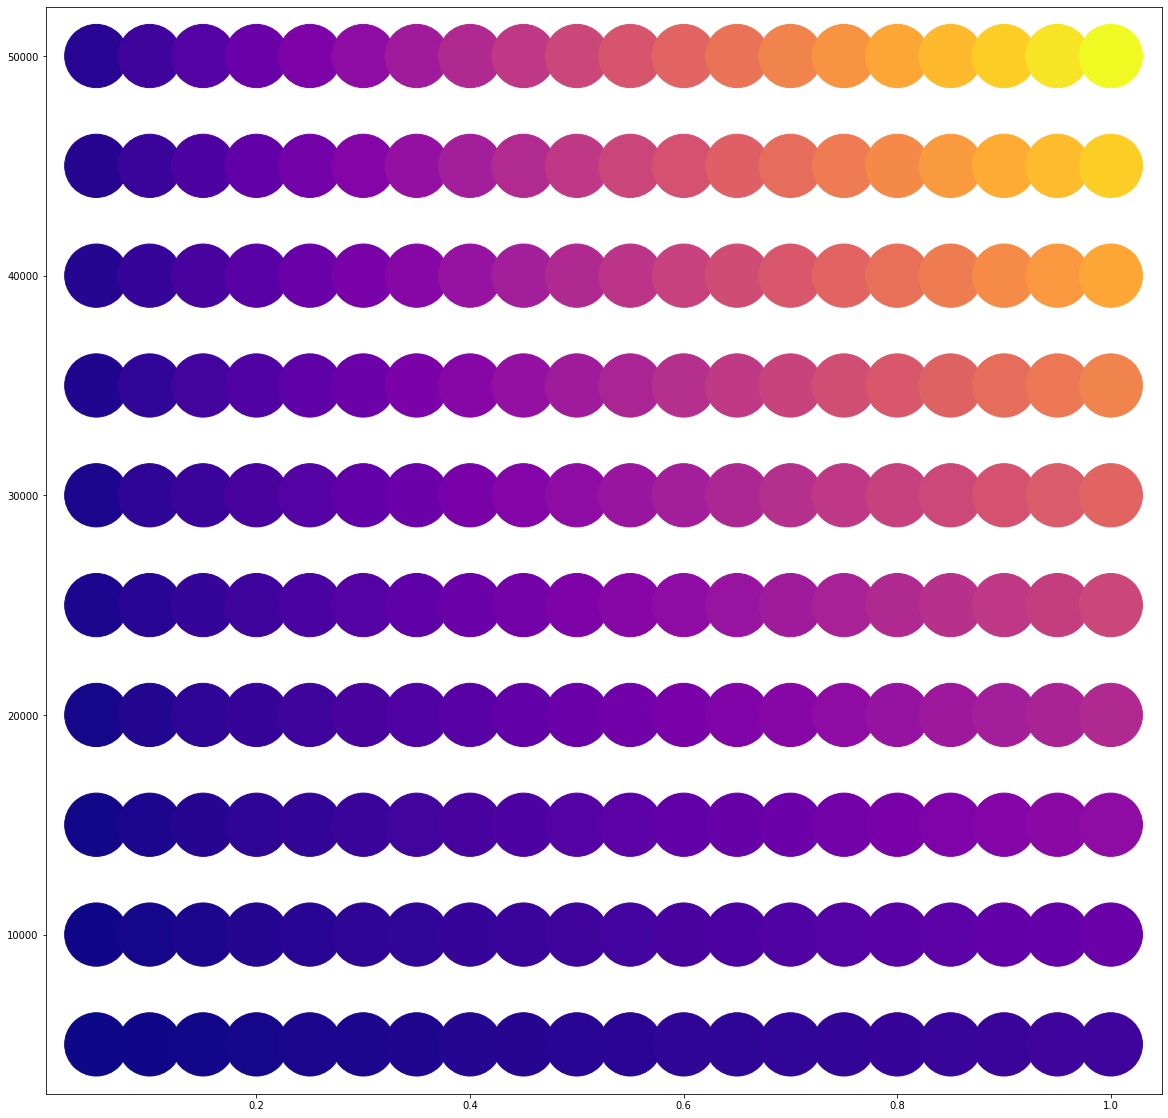

In [9]:
## Plot and save both outputs
x = []
y = []
scalval = []
for key, value in fitting_results.items():
    x.append(key[0])
    y.append(key[1])
    scalval.append(value[0])
# size and color:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
# ax.scatter(x, y, s=arrCnt, alpha=0.2)
ax.scatter(x, y, s=4000, c=scalval, cmap=cm.get_cmap('plasma')) # color instead of size 